# Preprocessing

- load audio
- put them into arrays
- perform cqt transform
- 

In [1]:
import os
import librosa
import pandas as pd
import numpy as np

train_audio_dir = 'datasets/musicnet/musicnet/train_data'
train_labels_dir = 'datasets/musicnet/musicnet/train_labels'

train_audio_data = {}
train_labels_data = {}

LIMIT = 10
count = 0
for filename in os.listdir(train_audio_dir):
    if count >= LIMIT:
        break
    else:
        filepath = os.path.join(train_audio_dir, filename)
        audio_data, sr = librosa.load(filepath, sr=None)
        train_audio_data[filename] = {'audio': audio_data, 'sample_rate': sr}
        count +=1

count = 0
for filename in os.listdir(train_labels_dir):
    if count >= LIMIT:
        break
    else:
        filepath = os.path.join(train_labels_dir, filename)
        train_labels_data[filename] = pd.read_csv(filepath)
        count+=1

In [2]:
print(train_audio_data)
print(train_labels_data)

{'1727.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1728.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1729.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1730.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1733.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1734.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1735.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1739.wav': {'audio': array([ 0.0000000e+00, -3.0517578e-05,  0.0000000e+00, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32), 'sample_rate': 44100}, '1742.wav': {'audio': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'sample_rate': 44100}, '1749.wav': {'audio': array([0., 0., 0

In [3]:
train_audio_array = []
train_label_array = []

for filename, data in train_audio_data.items():
    audio_array = data['audio']
    train_audio_array.append(audio_array)

for filename, data in train_labels_data.items():
        label_array = data.values
        train_label_array.append(label_array)


print(train_audio_array)
print(train_label_array)

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([ 0.0000000e+00, -3.0517578e-05,  0.0000000e+00, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]
[array([[9182, 90078, 43, ..., 4.0, 1.5, 'Dotted Quarter'],
       [9182, 33758, 42, ..., 4.0, 0.5, 'Eighth'],
       [9182, 62430, 1, ..., 4.0, 1.0, 'Quarter'],
       ...,
       [19226590, 19233758, 1, ..., 365.375, 0.125, 'Thirty Second'],
       [19233758, 19421150, 1, ..., 365.5, 2.5, 'Dotted Half'],
       [19233758, 19421150, 1, ..., 365.5, 2.5, 'Dotted Half']],
      dtype=objec

In [4]:
import librosa

train_cqt_array = [librosa.cqt(audio) for audio in train_audio_array]

/tmp/ipykernel_29441/4056661598.py:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(cqt_array, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note')


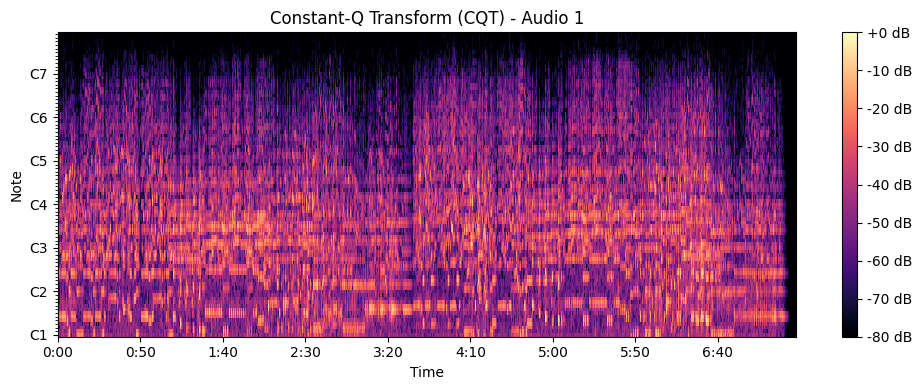

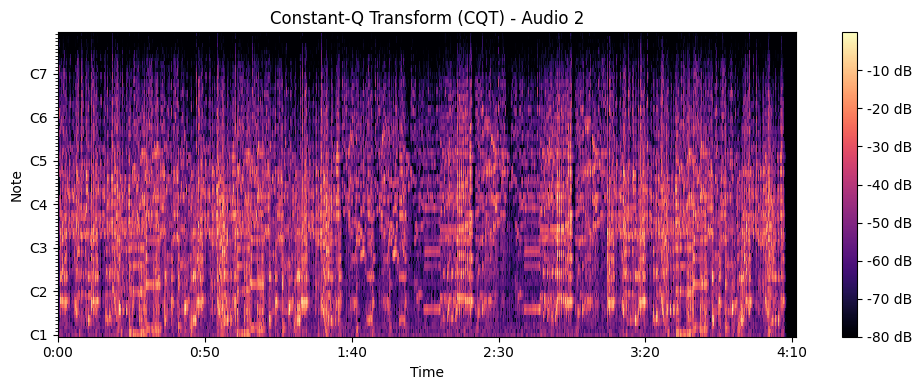

In [5]:
import matplotlib.pyplot as plt

for i in range(2):
    cqt_array = train_cqt_array[i]
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(cqt_array, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Constant-Q Transform (CQT) - Audio {}'.format(i+1))
    plt.tight_layout()
    plt.show()

In [6]:
# Padding is essential to have uniform train array to feed to neural net
# Find the maximum length among all CQT arrays
max_length = max(len(cqt_array[0]) for cqt_array in train_cqt_array)

# Pad all CQT arrays to match the maximum length
train_padded_cqt_arrays = []
for cqt_array in train_cqt_array:
    padded_cqt_array = np.pad(cqt_array, ((0, 0), (0, max_length - len(cqt_array[0]))), mode='constant')
    train_padded_cqt_arrays.append(padded_cqt_array)

# convert to numpy to check shape, if the array is not uniform it won't convert
train_padded_cqt_arrays = np.array(train_padded_cqt_arrays)
print(train_padded_cqt_arrays.shape) # number of audio files, number of frequency bin/range, number of timesteps

(10, 84, 79633)
